In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv(r"C:\Users\KVarshith\OneDrive - RealPage\Documents\p_projects\Thyroid_cancer\filtered_thyroid_data (1).csv")
df = pd.DataFrame(ds)
df.head(5)

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [40]:
feature_name = "Response"  # Replace with your feature name
value_counts = df[feature_name].value_counts()
print(f"Frequency of unique values for {feature_name}:\n{value_counts}")

Frequency of unique values for Response:
Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64


In [41]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Gender", "Adenopathy", "Pathology", "Focality", 
                        "Risk", "T", "N", "M", "Stage", "Response", "Recurred"]
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].map({'No': 0, 'Yes': 1})
df.head(5)

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,3,2,1,2,0,0,0,0,2,0
1,34,0,0,3,2,1,2,0,0,0,0,1,0
2,30,0,0,3,2,1,2,0,0,0,0,1,0
3,62,0,0,3,2,1,2,0,0,0,0,1,0
4,62,0,0,3,2,0,2,0,0,0,0,1,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              383 non-null    int64
 1   Gender           383 non-null    int32
 2   Hx Radiothreapy  383 non-null    int64
 3   Adenopathy       383 non-null    int32
 4   Pathology        383 non-null    int32
 5   Focality         383 non-null    int32
 6   Risk             383 non-null    int32
 7   T                383 non-null    int32
 8   N                383 non-null    int32
 9   M                383 non-null    int32
 10  Stage            383 non-null    int32
 11  Response         383 non-null    int32
 12  Recurred         383 non-null    int32
dtypes: int32(11), int64(2)
memory usage: 22.6 KB


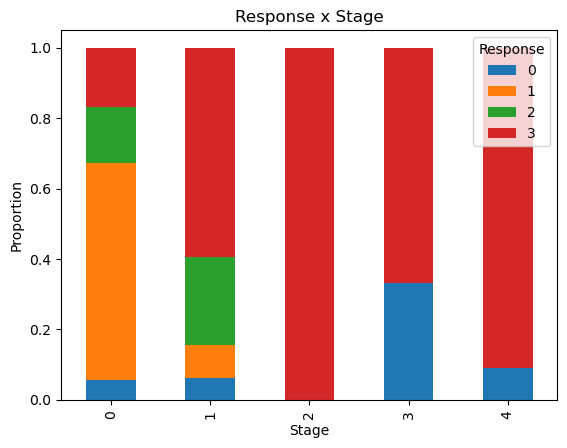

In [43]:
#Data Visualization

pd.crosstab(df['Stage'], df['Response'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Response x Stage')
plt.ylabel('Proportion')
plt.show()


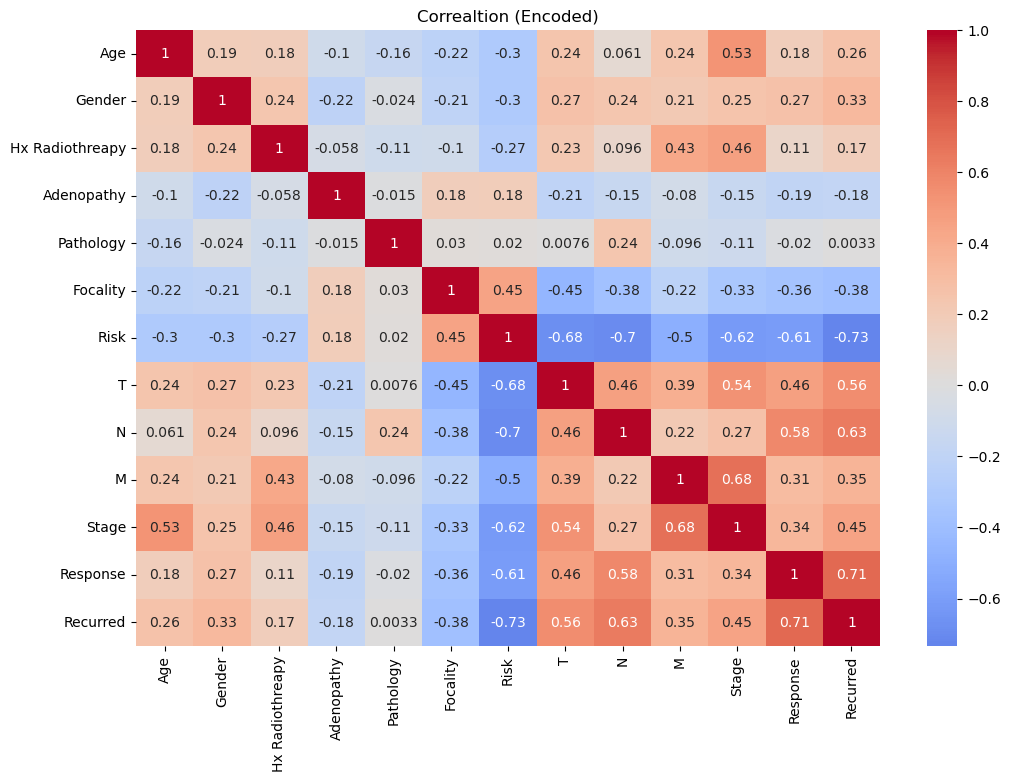

In [44]:
import seaborn as sns
df_encoded = df.apply(lambda x: x.factorize()[0] if x.dtype == 'object' else x)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correaltion (Encoded)')
plt.show()

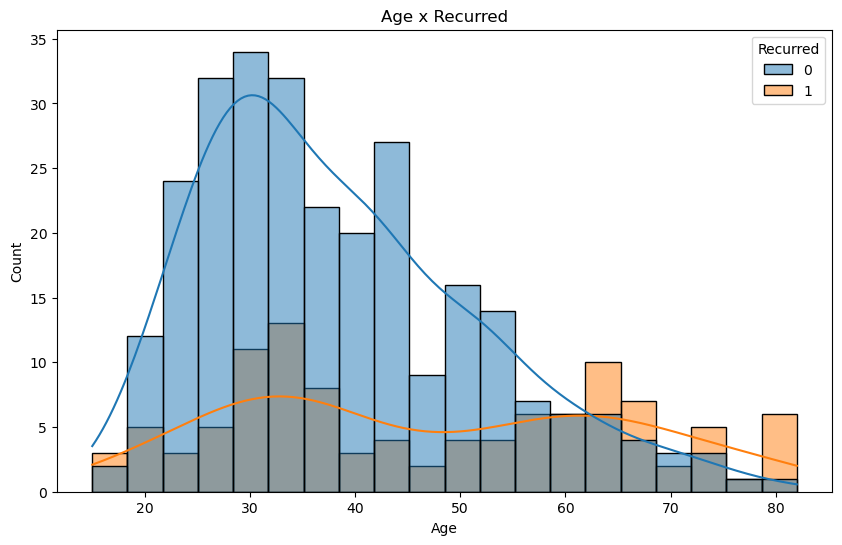

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Recurred', kde=True, bins=20)
plt.title('Age x Recurred')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['Recurred'])
y = df['Recurred']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42) 

#Standardize numerical features
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train models & store results
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

# Convert results into a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.922078   0.920754  0.922078  0.920574
Random Forest           0.974026   0.974026  0.974026  0.974026
Support Vector Machine  0.935065   0.934282  0.935065  0.934465


Confusion Matrix:
 [[57  1]
 [ 1 18]]


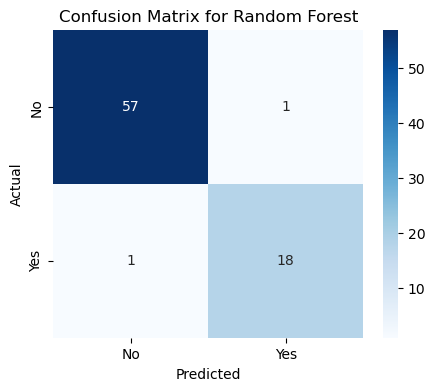

In [48]:
from sklearn.metrics import confusion_matrix
# Generate predictions from your trained model
y_pred = models["Random Forest"].predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

Confusion Matrix:
 [[56  2]
 [ 4 15]]


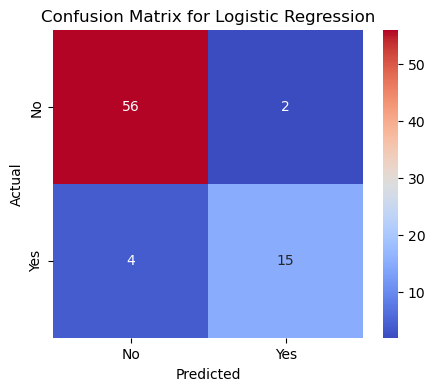

In [49]:
from sklearn.metrics import confusion_matrix
# Generate predictions from your trained model
y_pred = models["Logistic Regression"].predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [50]:
import joblib

# Save the trained model
joblib.dump(models["Random Forest"], "model.pkl")

['model.pkl']